## Final Project Submission

Please fill out:
* Student name: Aaron Onserio
* Student pace: Full time
* Scheduled project review date/time: 13th March 2023
* Instructor name: William Akombo, Lucille Kaleha, Nikita Njoroge
* Blog post URL:

## Project Title:

## Author: AARON ONSERIO

![microsoft hollywood](mcro_2.jpg)

## Project Overview
In the recent past, there has been increased production of movies in America which has drawn attention to Microsoft Company. Hence the company has decided to produce their own movies like what other rivals and companies do. Since Microsoft Company has no idea about movie recording and production, this report will seek to analyze data sets pertaining to movie studio creation and give insights as to why the company should utilize this available venture. This will be done by analyzing data sets provided and give more insights that will convince the stakeholders about this movie production proposal. This will be possible since the analysis will determine the best movies in the box office currently supported by visuals that gives clear picture of the current market trends in terms of movie production.

## Business Problem
Microsoft Company has decided to enter the business of video content scene by coming up with a new movie studio, but they have no idea about movie creation. The big question I will need to answer is: 

What types of films are best performing in the filming industry?

To solve their issues, I will analyze the available datasets to come up with answers that will solve their problem.

## Data Understanding
The main aim here is to undestand the kind of data the general structure of the datasets that I am going to work on.
 
I will be analyzing datasets from various film databases including IMDB, Tn.movie_budgets.csv, bom.movie_gross and tmdb.movies.csv datasets

![microsoft hollywood](studio.jpg)

# Loading Libraries

In [4]:
# Importing for data analysis
import pandas as pd

# NumPy for numerical analysis
import numpy as np

# Import Sqlite3 for databases management
import sqlite3

# Import Matplotlib.pyplot and Matplotlib.patches for data visualization
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns 


# Loading Data

Dataset 1: Investigation and understanding IMDB dataset

Understanding movie_ratings data

In [5]:
conn = sqlite3.connect("im.db")
im_db = pd.read_sql("""
                 SELECT * FROM movie_ratings;
                 """, conn)
im_db

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# General description of the 'movie_ratings' data
im_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Examining movie_basics data

In [7]:
im_db2 = pd.read_sql("""
                 SELECT * FROM movie_basics;
                 """, conn)
im_db2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
# General description of the 'movie_basics' data
im_db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# Joining the movie_basics and movie_ratings
I will join the "movie_basics" and "movie_ratings" using the primary keys for deeped understanding of the data

In [9]:
# Preview the tables of interest in the IMDB data for the joined tables
im_db3 = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id;
                  """, conn)
im_db3

,primary_title,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,None,6.6,5


For deep understanding I will input more conditions that will enable me to understand which genres garnered most number of votes as I order them by 'numvotes'

In [10]:
# Preview the tables of interest in the IMDB data for the joined tables
im_db4 = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 6.8 AND 9
                   ORDER BY numvotes DESC
                   LIMIT 50;
                  """, conn)
im_db4.head(10)

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [11]:
# General description of the joined data
im_db4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  50 non-null     object 
 1   start_year     50 non-null     int64  
 2   genres         50 non-null     object 
 3   averagerating  50 non-null     float64
 4   numvotes       50 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [12]:
# Grouping the directors, their movies and the rating of the movies they have produced
dir_rating = ("""
      SELECT movie_basics.primary_title, averagerating, primary_name
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id;     
              """)
dir = pd.read_sql(dir_rating,conn)
dir

,primary_title,averagerating,primary_name
0,Life's a Beach,3.9,Tony Vitale
1,Steve Phoenix: The Untold Story,5.5,Bill Haley
2,The Babymakers,5.0,Jay Chandrasekhar
3,The Babymakers,5.0,Jay Chandrasekhar
4,Bulletface,5.8,Albert Pyun
...,...,...,...
181382,Reversing Roe,7.4,Anne Sundberg
181383,The Princess Switch,6.0,Mike Rohl
181384,The Princess Switch,6.0,Mike Rohl
181385,Doozy,6.7,Richard Squires


Dataset 2: Investigation and understanding Tn.movie_budgets.csv dataset

In [13]:
# Load the tn.movie_budgets as a pandas DataFrame and assign it to the variable 'tn_movie_budget' and view a few rows
tn_movie_budget = pd.read_csv("tn.movie_budgets.csv", index_col=0)
tn_movie_budget.head(10) 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [14]:
# To check if I have any NULL values in the data and calculate their sum
tn_movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
# Checking for the general information about the data helps me to understand what class is the dataframe, 
# how may columns and the data types of each column
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [16]:
# Checking if there are any duplicated values in the data and the total count of those duplicated values
tn_movie_budget.duplicated().value_counts()

False    5782
dtype: int64

Since there are no duplicate data, I will go a head and start cleaning the DataFrame by dropping the irrelevant columns and organizing the DataFrame. 

In [17]:
# Drop the release data
tn_movie_budget = tn_movie_budget.drop(["release_date"], axis=1)
tn_movie_budget.head()

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Dataset 3: Investigation and understanding Bom.movie_gross.csv dataset

In [18]:
# # Load the bom.movie_gross as a pandas DataFrame and assign it to the variable 'bom_movie_gross' and view a few rows
bom_movie_gross = pd.read_csv("bom.movie_gross.csv")
bom_movie_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [19]:
# Checking for the general information about the data helps me to understand what class is the dataframe 

bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [20]:
# Checking for the duplicated value counts
bom_movie_gross.duplicated().value_counts()

False    3387
dtype: int64

In [21]:
# Checking for any missing values in the dataset
# and calculate the percentage of the missing values in my data
bom_movie_gross.isna().sum()/len(bom_movie_gross)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

From the information above, we have 0.15 (round off to 2 decimal places) percent of the missing values in the studio column. We also have 0.86 percent of the missing values in the domestic gross column and 39.86 percent of the foreign gross column missing values. 

## Data Preparation

In the data preparation section I will use the insights derived from the understanding of the data provided and I will use this prepared data to analyze and visuzlize.

Based on the standard of success I'm using to determine the best performing films in the box office, I will first need to identify, understand and clean the relevant data that shall be used to calculate the return on investment, best performing genres and the average rating of the directors of the movies tat I can recomend to Microsoft Company. Furthermore, the business problem is looking for the types of films that are performing the best, therefore, I will narrow my analysis to the most produced genres, best performing genres, top performing directors and the return on investment.

## Data Preparation for im.db dataset

Now we can get the popular genres that are most produces and their value count that will be used for our data analysis. 

In [22]:
# Finding the top 10 most popular genres by total value count 
pop_genres = im_db4["genres"].value_counts()
pop_genres.head(10)

Action,Adventure,Sci-Fi     16
Action,Adventure,Comedy      3
Action,Adventure,Fantasy     3
Adventure,Drama,Sci-Fi       2
Biography,Drama,History      2
Crime,Mystery,Thriller       1
Adventure,Comedy,Crime       1
Action,Sci-Fi                1
Action,Thriller              1
Drama,Music                  1
Name: genres, dtype: int64

Next we will pass our im_db4 into a DataFrame and identify the key genres or the most voted genres by getting their mean number of votes ans numvotes and sort them in ana ascending order. 

In [23]:
# Preview the tables of interest on the key genres against the mean votes they garned sorted in ascending order
key_genre = pd.DataFrame(im_db4.groupby('genres')['numvotes'].mean()).sort_values( by = 'numvotes', ascending = False).iloc[:15]
key_genre

,numvotes
genres,
"Action,Thriller",1.387769e+06
"Drama,Western",1.211405e+06
"Biography,Crime,Drama",1.035358e+06
"Mystery,Thriller",1.005960e+06
"Adventure,Drama,Sci-Fi",9.897250e+05
"Action,Adventure,Comedy",7.712503e+05
"Action,Adventure,Sci-Fi",7.623030e+05
"Drama,Mystery,Thriller",7.615920e+05
"Adventure,Family,Fantasy",7.196290e+05


Next we will order the average rating of the directors and the count of movies they have produces against the AVG of the averagerating they have and pass the data into a DataFrame

In [24]:
joining_tables = '''SELECT primary_name, COUNT(primary_name), AVG(averagerating)
FROM persons AS p
JOIN directors AS d ON p.person_id = d.person_id
JOIN movie_basics AS mb ON mb.movie_id = d.movie_id
JOIN movie_ratings AS mr ON mr.movie_id = mb.movie_id
GROUP BY primary_name, averagerating
HAVING AVG(averagerating) > 7 AND COUNT(primary_name) > 6
ORDER BY AVG(averagerating) DESC;
'''
director_rated = pd.read_sql(joining_tables, conn)
director_rated.head(10) 

,primary_name,COUNT(primary_name),AVG(averagerating)
0,Damir Radic,7,9.2
1,Corey Lubowich,12,9.1
2,Dennis Korbylo,28,9.0
3,Erin Korbylo,28,9.0
4,Lisa Gossels,17,9.0
5,Sylvia Broeckx,28,9.0
6,Declan Lynch,11,8.9
7,Ben Rapson,8,8.8
8,Christian Palmer,8,8.8
9,Ian J. Connors,8,8.8


In [25]:
# Passing the popular directors in to te DataFrame
pop_dir = pd.DataFrame(director_rated).head(10)
pop_dir

,primary_name,COUNT(primary_name),AVG(averagerating)
0,Damir Radic,7,9.2
1,Corey Lubowich,12,9.1
2,Dennis Korbylo,28,9.0
3,Erin Korbylo,28,9.0
4,Lisa Gossels,17,9.0
5,Sylvia Broeckx,28,9.0
6,Declan Lynch,11,8.9
7,Ben Rapson,8,8.8
8,Christian Palmer,8,8.8
9,Ian J. Connors,8,8.8


## Data Preparation for Tn.movie_budget Dataset

For Tn.movie_budget we are going to clean it by removing special characters that are not recognized by Python and add a new column for the entire rows and call it Return on Investment. We will also assign a new variable to our clean dataframe that we will use for analysis. 

In [26]:
# Remove the characters that are not recognized by Python 
# characters such as '&', '-', and ',' from the data/columns
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movie_budget['domestic_gross']= tn_movie_budget['domestic_gross'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movie_budget['worldwide_gross']= tn_movie_budget['worldwide_gross'].str.replace('$', "").str.replace(',',"").astype(float)
tn_movie_budget.head() # Viweing a few data after removing characters

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [27]:
# Creatinf a column for return on investment(returm_on_inv) which will be calculated by 
# The formula for calculating return_on_inv is to divide the worldwide gross by the production budget and multiplying the divident by 100
tn_movie_budget['return_on_inv'] = (tn_movie_budget['worldwide_gross'] / tn_movie_budget['production_budget'])*100

tn_movie_budget.head(10) # View a few of the data on the return_on_inv

,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,653.257713
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,254.667286
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,42.789243
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,424.384139
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,415.369636
6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,671.016739
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,682.711400
8,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,321.140142
9,Justice League,300000000.0,229024295.0,6.559452e+08,218.648403


In [28]:
# Assigning a new variable to the cleaned dataset that I will use to analyze. 
tn_movie_budget_sample = tn_movie_budget.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
tn_movie_budget_sample.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,49875.000000
93,Paranormal Activity,450000.0,107918810.0,194183034.0,43151.785333
80,The Gallows,100000.0,22764410.0,41656474.0,41656.474000
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,41383.333333
10,Super Size Me,65000.0,11529368.0,22233808.0,34205.858462
47,Bambi,858000.0,102797000.0,268000000.0,31235.431235
74,El Mariachi,7000.0,2040920.0,2041928.0,29170.400000
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,26392.161404
11,Rocky,1000000.0,117235147.0,225000000.0,22500.000000


At this stage we have identified and cleaned the data that is being used to get films that are performing the best accodring to our standards.

## Data Preparation for Bom.movie_gross Dataset

From the Bom.movie_gross csv dadaset, we had 0.15 (round off to 2 decimal places) percent of the missing values in the studio column. We also have 0.86 percent of the missing values in the domestic gross column and 39.86 percent of the foreign gross column missing values. It is necessary to drop the whole column of foreigh gross and drop a few row on the studio and domestic gross columns since their percentage of the missing valeus are insignificant. 

In [29]:
 # and dropping the rows with the missing values in the studio column
bom_movie_gross = bom_movie_gross[bom_movie_gross['studio'].notna()]

# Dropping the rows with the missing values in the domestic gross column
bom_movie_gross.dropna(subset = ['domestic_gross'], axis =0, inplace = True)

# and the entire column of foreign column with NULL values
bom_movie_gross.drop('foreign_gross', axis=1, inplace= True )

bom_movie_gross.isna().sum()


title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [30]:
bom_movie_gross.head(10)

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010
6,Iron Man 2,Par.,312400000.0,2010
7,Tangled,BV,200800000.0,2010
8,Despicable Me,Uni.,251500000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,2010


In [31]:
bom_movie_gross_grouping = bom_movie_gross.groupby("studio")["domestic_gross"].mean()
bom_movie_gross_sorted = pd.DataFrame(bom_movie_gross_grouping)
bom_movie_gross_sorted

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
...,...
XL,2.290000e+05
YFG,1.100000e+06
Yash,2.433185e+06


## Data Analysis

In the data analysis phase I will focuses on exploring the relationships in the previously prepared data to determine way forward for the Microsoft Company and on which movies they will indulge into in order to make profitable business.

# 1. Genre
Genre is the category within whic a film is classified and we are going to plot a bar graph to visualize the most popular produced genres. 
We need to understand the number of genre released and gauge the distribution as per the genre.

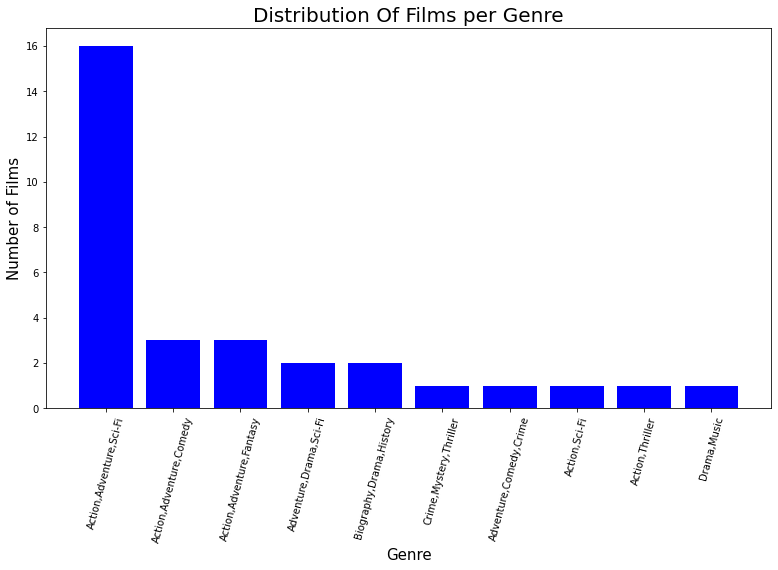

In [32]:
# Create a plot that counts the number of films by genre
fig, ax = plt.subplots(figsize=(13,7))
x = pop_genres.head(10).index
y = pop_genres.head(10).values
plt.bar(x,y, color="blue")
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films per Genre', fontsize=20)
plt.xticks(rotation=75, fontsize=10);

From the above plotting, we can be observed that the distribution of the genre of films in the dataset is not evenly distributed. It is however important to note that of the Popular Genre Films that were majority of were Action,Adventure,Sci-Fi. 

However, before any conclusion is made, we need to first understand the number of votes the films garned in each genre and gauge their popularity per genre.



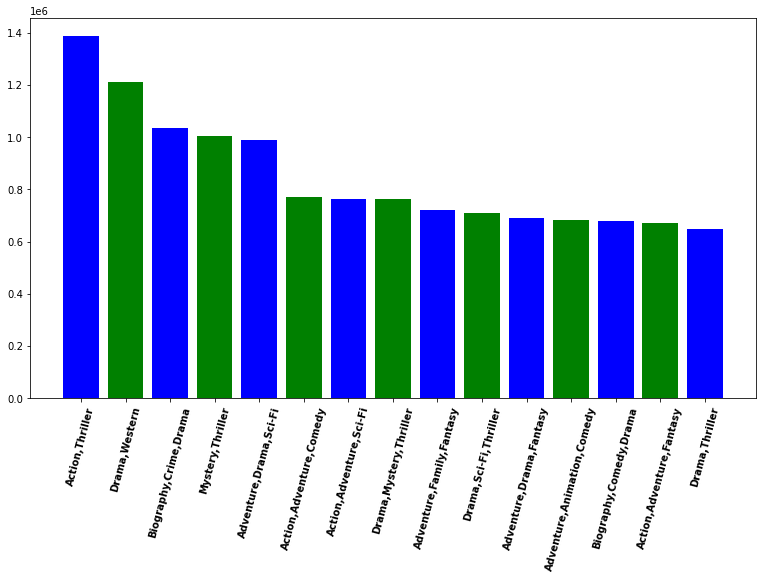

In [33]:
# Create a plot that counts the number of votes by genre
colors = ["blue", "green"]
plt.figure(figsize=(13, 7))
plt.xticks(rotation=75, fontsize=10, fontweight="bold")
y = key_genre["numvotes"]
plt.bar(y.index, y.values, width=0.8, color=colors)
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Numvotes', fontsize=15)
ax.set_title('Distribution Of Genres per Votes', fontsize=20)
plt.show();

From the above observations, we can conclude that Action,Thriller genres were the most popular with the highest number of votes. This suggests that the top 5 genres that can sale most are:Action,Thriller; Drama,Western; Biography,Crime,Drama; Mystery,Thriller; and Adventure,Drama,Sci-Fi films averagely are the most watched films and can make the most money.

# 2. Directors
We will plot a bargraph to visualize the relationship between directors and average rating for the films they produce. We had already created a DataFrame that contains the movies COUNT(primary_name) of movies produced and their AVG(averagerating) information. 

We want to look for directors with a proven track record, therefor, we need to identify directors that have a good number of produced films and with the top most rating. Thereafter, we will be plot a barchart to visualize the relationship between directors and average rating and the number of the films they have produced. 

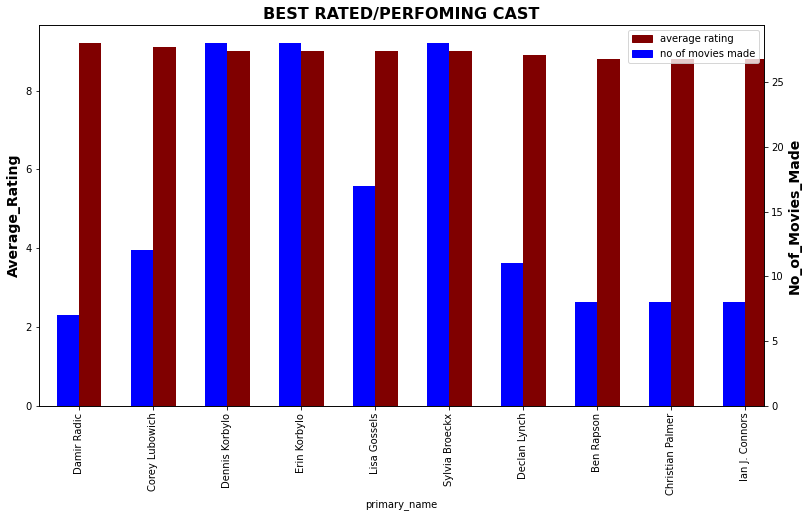

In [34]:
# Plot a bar chart that shows the average rating and number of film per director for the top 10 directors
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .3
gr = pop_dir.set_index('primary_name')


plt.xticks(rotation=75, fontsize=10, fontweight= 'bold')
plt.title('BEST RATED/PERFOMING CAST', fontsize=16, fontweight='bold')
ax.set_ylabel('Average_Rating', fontsize=14, fontweight='bold')
ax2.set_ylabel('No_of_Movies_Made', fontsize=14, fontweight='bold')


gr['AVG(averagerating)'].plot(kind='bar',color='maroon',ax=ax,width=width, position=0)
gr['COUNT(primary_name)'].plot(kind='bar',color='blue', ax=ax2,width = width, position=1)

maroon_patch = mpatches.Patch(color='maroon', label='average rating')
blue_patch = mpatches.Patch(color='blue', label='no of movies made')

plt.legend(handles=[maroon_patch, blue_patch])
# Add the legend
plt.show()

We see that the top most 3 directors with a highest average ratings and the highest number of films produced are: Dennis Korbylo, Erin Korbylo and Sylvia Broeckx.

# 3. Production Budgets and Return on Investment
Production budgets can be defined  as the amount of money that the studio invests into produce the films. We will be plotting a line graph to visualize the relationship between the "production_budget" and "return_on_inv".

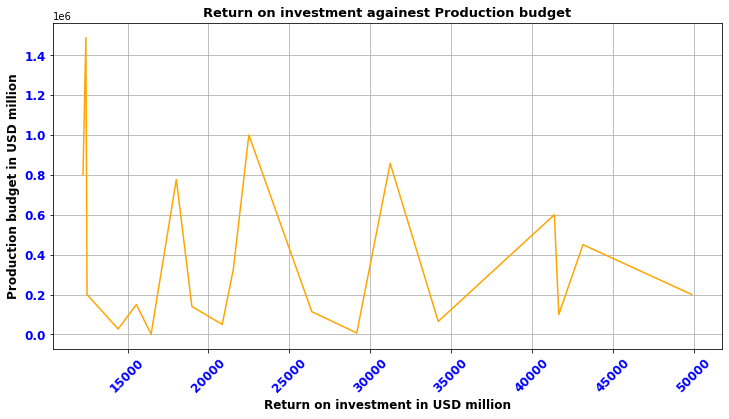

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45, fontsize=16, fontweight="bold")
plt.xlabel("Return on investment in USD million", fontsize=12, fontweight="bold")
plt.ylabel("Production budget in USD million", fontsize=12, fontweight="bold")
plt.title("Return on investment againest Production budget", fontsize=13, fontweight="bold")
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.yticks( fontsize = 12, fontweight = 'bold', color = 'blue')
x = tn_movie_budget_sample["return_on_inv"]
y = tn_movie_budget_sample["production_budget"]
plt.grid()
plt.plot(x,y, color='orange')
plt.show();

We can note from the line graph above that there is a negative correlation between the production budget and the return on investment, and the relationship is not linear. From 0 to 100 million dollars, the correlation is strongly negative. However, from 100 to 300 million dollars, there is no distict correlation between the return on investment and the budget. Looking at the Pearson correlation coefficient, we see that the correlation coefficient (-0.6) suggests a moderately negative relationship between the return on investment and the production budget.

## 4. Domestic gross and the Studios
Domestic gross of the film is the amount of money that the film made domestically. We are going to plot a barchart to visualize the relationship between the 'domestic_gross' and 'stidios'. This will show us which studion made more income locally from selling of the films. 

In [36]:
x =bom_movie_gross_sorted.sort_values(by ="domestic_gross", ascending=False).head(10)


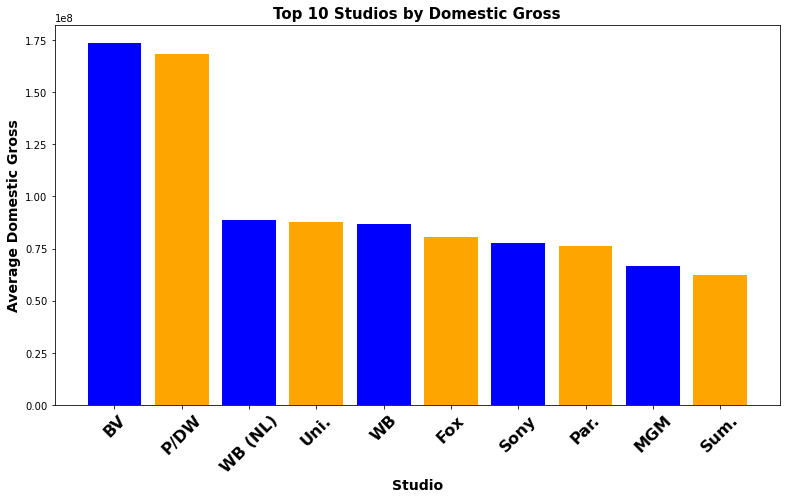

In [37]:
# Group movies by studio and calculate their average domestic gross
bom_movie_gross_sorted = bom_movie_gross.groupby("studio")["domestic_gross"].mean()

# Create a bar plot of the top 10 studios by domestic gross
plt.figure(figsize=(13,7))
colors = ["blue", "orange"]
plt.bar(x['domestic_gross'].index, x['domestic_gross'].values, color=colors, width=0.8)
plt.xticks(rotation=45, fontsize=16, fontweight="bold")
plt.xlabel("Studio", fontsize=14, fontweight="bold")
plt.ylabel("Average Domestic Gross", fontsize=14, fontweight="bold")
plt.title("Top 10 Studios by Domestic Gross", fontsize=15, fontweight="bold")
plt.show()

From the observation above, we can note that BV and P/DW studios made more income from the sales they made domestically. 

## Conclusions
From the analysis we made above, the following recommendations can be reached for the types of films that are the best performing in the box office:

1. The Production Budget of a film has a moderately negative correlation with its return on investment.

2. Films directed by Dennis Korbylo, Erin Korbylo and Sylvia Broeckx produce the highest ratings and they have the best proven track record and are likely to produce films with higher return on investment.

3. "Action,Thriller", "Drama,Western", "Biography,Crime,Drama", "Mystery,Thriller", and "Adventure,Drama,Sci-Fi" genres are more likely to have a higher return on investment. It is however important to note that 'Action,Adventure,Sci-Fi' films are the top most produced. All these averagely are the most watched films and can make the most money.

## Next Step

- The above analysis alone can not solve the business problem because there are other factors that need to be considered that affect the business such as the amount of money spent on marketing the films and other unpredicted calamities like fluctuation on economy, pandemics and many more. 
- To improve this analysis more factors like money spent on marketing need to be considered to make full conclusions. 